In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tennis_data = pd.read_csv("complete_data.csv")
tennis_data.head()

,Unnamed: 0,Location,Date,Series,Court,Surface,HR_name,LR_name,higher_ranked_rank,higher_ranked_prob,...,lower_ranked_surface_type_win_pct,lower_ranked_series_type_win_pct,diff_rank,diff_prob,diff_matches_per_day_rate,diff_win_pct,diff_court_type_win_pct,diff_surface_type_win_pct,diff_series_type_win_pct,HR_win?
0,0,Chennai,2003-01-04,International,Outdoor,Hard,Chela J.I.,Kucera K.,23,0.5965,...,0.666667,0.600000,-60,0.193,0.000000,-0.1,0.269231,0.017544,0.223529,0
1,1,Chennai,2003-01-05,International,Outdoor,Hard,Srichaphan P.,Kucera K.,16,0.7210,...,0.687500,0.636364,-67,0.442,0.000000,0.1,0.200000,0.090278,0.220779,1
2,2,Doha,2003-01-02,International,Outdoor,Hard,Federer R.,Gambill J.M.,6,0.7460,...,0.636364,0.642857,-36,0.492,0.066667,0.3,-0.150000,0.077922,-0.042857,0
3,3,Doha,2003-01-02,International,Outdoor,Hard,Youzhny M.,Vicente F.,32,0.6750,...,0.500000,0.300000,-26,0.350,0.016667,0.5,0.352941,0.250000,0.450000,1
4,4,Doha,2003-01-03,International,Outdoor,Hard,Youzhny M.,Gambill J.M.,32,0.5000,...,0.652174,0.666667,-10,0.000,0.000000,0.4,0.111111,0.117057,0.095238,0


In [3]:
tennis_data = tennis_data.drop("Unnamed: 0",axis=1)

In [4]:
tennis_data.head()

,Location,Date,Series,Court,Surface,HR_name,LR_name,higher_ranked_rank,higher_ranked_prob,higher_ranked_matches_per_day_rate,...,lower_ranked_surface_type_win_pct,lower_ranked_series_type_win_pct,diff_rank,diff_prob,diff_matches_per_day_rate,diff_win_pct,diff_court_type_win_pct,diff_surface_type_win_pct,diff_series_type_win_pct,HR_win?
0,Chennai,2003-01-04,International,Outdoor,Hard,Chela J.I.,Kucera K.,23,0.5965,0.050000,...,0.666667,0.600000,-60,0.193,0.000000,-0.1,0.269231,0.017544,0.223529,0
1,Chennai,2003-01-05,International,Outdoor,Hard,Srichaphan P.,Kucera K.,16,0.7210,0.066667,...,0.687500,0.636364,-67,0.442,0.000000,0.1,0.200000,0.090278,0.220779,1
2,Doha,2003-01-02,International,Outdoor,Hard,Federer R.,Gambill J.M.,6,0.7460,0.100000,...,0.636364,0.642857,-36,0.492,0.066667,0.3,-0.150000,0.077922,-0.042857,0
3,Doha,2003-01-02,International,Outdoor,Hard,Youzhny M.,Vicente F.,32,0.6750,0.033333,...,0.500000,0.300000,-26,0.350,0.016667,0.5,0.352941,0.250000,0.450000,1
4,Doha,2003-01-03,International,Outdoor,Hard,Youzhny M.,Gambill J.M.,32,0.5000,0.050000,...,0.652174,0.666667,-10,0.000,0.000000,0.4,0.111111,0.117057,0.095238,0


In [5]:
len(tennis_data)

26388

In [6]:
tennis_data.describe()

,higher_ranked_rank,higher_ranked_prob,higher_ranked_matches_per_day_rate,higher_ranked_win_pct,higher_ranked_court_type_win_pct,higher_ranked_surface_type_win_pct,higher_ranked_series_type_win_pct,lower_ranked_rank,lower_ranked_prob,lower_ranked_matches_per_day_rate,...,lower_ranked_surface_type_win_pct,lower_ranked_series_type_win_pct,diff_rank,diff_prob,diff_matches_per_day_rate,diff_win_pct,diff_court_type_win_pct,diff_surface_type_win_pct,diff_series_type_win_pct,HR_win?
count,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,...,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000,26388.000000
mean,28.540814,0.659066,0.151218,0.602020,0.582163,0.584364,0.597209,75.692474,0.340934,0.119630,...,0.496141,0.495465,-47.151660,0.318133,0.031589,0.106279,0.091682,0.088223,0.101744,0.650712
std,25.652696,0.169614,0.080163,0.183809,0.127512,0.136119,0.140396,77.208276,0.169614,0.073751,...,0.117922,0.124291,71.134174,0.339229,0.079182,0.196234,0.135150,0.149419,0.157917,0.476754
min,1.000000,-0.000500,0.000000,0.000000,0.083333,0.000000,0.083333,2.000000,0.010000,0.000000,...,0.000000,0.000000,-1815.000000,-1.001000,-0.300000,-0.700000,-0.523188,-0.572039,-0.565564,0.000000
25%,9.000000,0.562000,0.100000,0.500000,0.493827,0.500000,0.500000,38.000000,0.215000,0.066667,...,0.418919,0.415094,-56.000000,0.124000,-0.016667,0.000000,0.004012,-0.009305,-0.003208,0.000000
50%,22.000000,0.675000,0.150000,0.600000,0.573529,0.582182,0.590909,62.000000,0.325000,0.116667,...,0.500000,0.500000,-31.000000,0.350000,0.033333,0.100000,0.087335,0.086310,0.098163,1.000000
75%,41.000000,0.785000,0.200000,0.700000,0.652941,0.660000,0.686567,92.000000,0.438000,0.166667,...,0.574468,0.575758,-15.000000,0.570000,0.083333,0.200000,0.176761,0.183733,0.203509,1.000000
max,661.000000,0.990000,0.483333,1.000000,0.900000,0.984848,1.000000,1821.000000,1.000500,0.450000,...,0.938596,0.933333,-1.000000,0.980000,0.416667,0.900000,0.598485,0.747253,0.885609,1.000000


In [7]:
tennis_data.columns

Index(['Location', 'Date', 'Series', 'Court', 'Surface', 'HR_name', 'LR_name',
       'higher_ranked_rank', 'higher_ranked_prob',
       'higher_ranked_matches_per_day_rate', 'higher_ranked_win_pct',
       'higher_ranked_court_type_win_pct',
       'higher_ranked_surface_type_win_pct',
       'higher_ranked_series_type_win_pct', 'lower_ranked_rank',
       'lower_ranked_prob', 'lower_ranked_matches_per_day_rate',
       'lower_ranked_win_pct', 'lower_ranked_court_type_win_pct',
       'lower_ranked_surface_type_win_pct', 'lower_ranked_series_type_win_pct',
       'diff_rank', 'diff_prob', 'diff_matches_per_day_rate', 'diff_win_pct',
       'diff_court_type_win_pct', 'diff_surface_type_win_pct',
       'diff_series_type_win_pct', 'HR_win?'],
      dtype='object')

In [10]:
tennis_data["HR_win?"].value_counts()

yes    17171
no      9217
Name: HR_win?, dtype: int64

In [9]:
tennis_data["HR_win?"] = np.where(tennis_data["HR_win?"]==0, "no", "yes")
eda = tennis_data[['Location', 'Date', 'Series', 'Court',
       'Surface', 'diff_prob', "HR_win?",
       'diff_win_pct', 'diff_court_type_win_pct',
       'diff_surface_type_win_pct', 'diff_series_type_win_pct']]

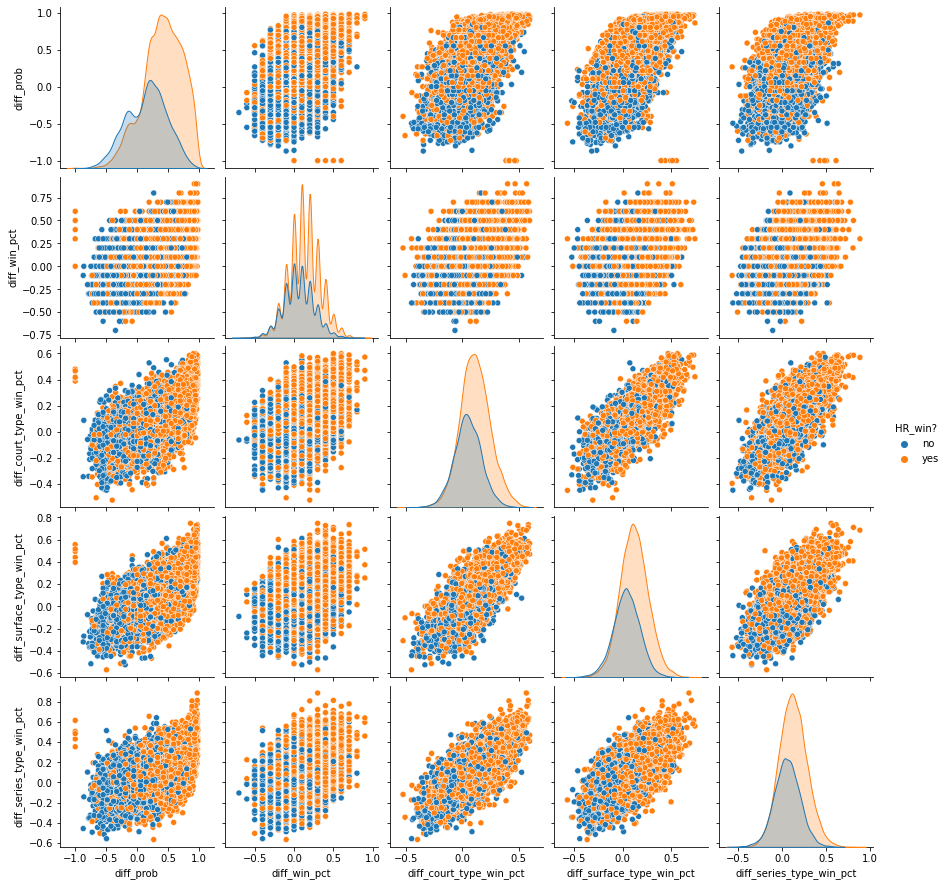

In [11]:
sns.pairplot(data=eda, hue="HR_win?")

Looking at the distributions of each variable, it looks like the range of values in which a lower-ranked player wins is much narrower than in which a higher-ranked player wins. For example, looking at court type winning percentage, the median difference is about 0.2 for upsets, but 0.6 in which the expected outcome occurs. When these differences are quite large, it will be easy to predict that most of the time, a higher-ranked player should win. The harder part is when the match is more balanced. At that point, the odds of predicting a winner become much closer to 50-50, and our model will do little better than guessing. That is why we need to create additional features for when differences become more granular. For example, maybe the rankings are balanced, but one player has an excellent record against the other player when they face each other. So, we should create an additional feature for the difference in head-to-head winning percentage. We could also create a feature for the player's winning percentage in that type of tournament (Grand Slam, Masters, etc.), so if a player does better in one type, that would increase the probability. We will re-run this plot once we add new features to make sure there are no problems with multicollinearity.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'diff_prob'),
  Text(1, 0, 'diff_win_pct'),
  Text(2, 0, 'diff_court_type_win_pct'),
  Text(3, 0, 'diff_surface_type_win_pct'),
  Text(4, 0, 'diff_series_type_win_pct')])

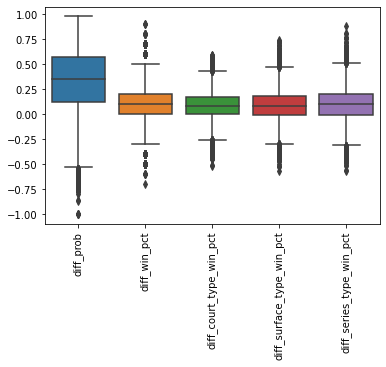

In [18]:
sns.boxplot(data=eda)
plt.xticks(rotation=90)

The median difference in historic winning percentage between higher rank and lower rank is much lower than the difference in books' probability between higher and lower ranked players, so matches are much more evenly matched than the books think.

All of the winning percentages are well correlated, so we might have to only use historical winning percentage.

In [ ]:
eda.corr()

,diff_prob,diff_win_pct,diff_court_type_win_pct,diff_surface_type_win_pct,diff_series_type_win_pct
diff_prob,1.000000,0.513319,0.624181,0.675334,0.582849
diff_win_pct,0.513319,1.000000,0.371433,0.362828,0.345910
diff_court_type_win_pct,0.624181,0.371433,1.000000,0.802805,0.771331
diff_surface_type_win_pct,0.675334,0.362828,0.802805,1.000000,0.701164
diff_series_type_win_pct,0.582849,0.345910,0.771331,0.701164,1.000000


In [ ]:
tennis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26408 entries, 0 to 26407
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ATP                         26408 non-null  int64  
 1   Location                    26408 non-null  object 
 2   Tournament                  26408 non-null  object 
 3   Date                        26408 non-null  object 
 4   Year                        26408 non-null  int64  
 5   Series                      26408 non-null  object 
 6   Court                       26408 non-null  object 
 7   Surface                     26408 non-null  object 
 8   Round                       26408 non-null  object 
 9   HR_win?                     26408 non-null  int64  
 10  diff_rank                   26408 non-null  int64  
 11  diff_prob                   26408 non-null  float64
 12  diff_days_since_last_match  26408 non-null  int64  
 13  diff_win_pct                264

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'International'),
  Text(1, 0, 'Grand Slam'),
  Text(2, 0, 'Masters'),
  Text(3, 0, 'International Gold'),
  Text(4, 0, 'Masters Cup'),
  Text(5, 0, 'ATP250'),
  Text(6, 0, 'Masters 1000'),
  Text(7, 0, 'ATP500')])

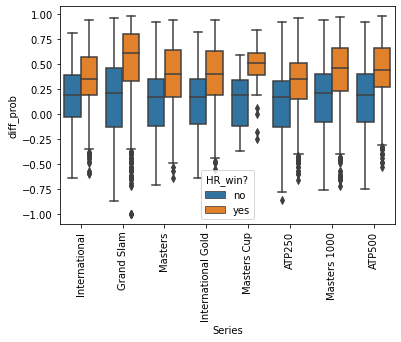

In [20]:
sns.boxplot(x="Series",y="diff_prob",data=eda,hue="HR_win?")
plt.xticks(rotation=90)


Looking at the series type, the median difference in probability between the lower-ranked player and higher-ranked player is nearly constant with matches in which the higher ranked player loses. However, matches in which the higher-ranked player win have a much greater difference in probability. This is especially pronounced for Grand Slam events, when the median difference in win probability is greater than 0.5. That gives the higher-ranked player an almost 80 percent chance of winning in a Grand Slam match; these are very lopsided odds.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'International'),
  Text(1, 0, 'Grand Slam'),
  Text(2, 0, 'Masters'),
  Text(3, 0, 'International Gold'),
  Text(4, 0, 'Masters Cup'),
  Text(5, 0, 'ATP250'),
  Text(6, 0, 'Masters 1000'),
  Text(7, 0, 'ATP500')])

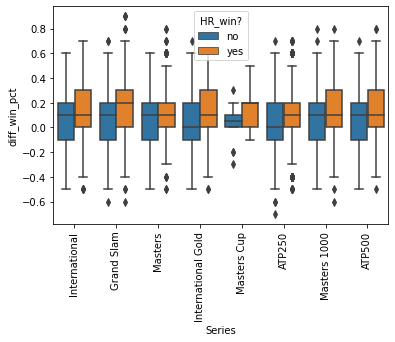

In [21]:
sns.boxplot(x="Series",y="diff_win_pct",data=eda,hue="HR_win?")
plt.xticks(rotation=90)

The median difference in winning percentage is also relatively constant across tournament type in which the higher-ranked player loses, so the matches in which a higher-ranked player loses tend to be balanced. When the higher-ranked player wins, the winning percentage of the higher-ranked player is much higher in Grand Slam events. It seems that higher-ranked players do much better with the rigors of Grand Slam tournaments, while lower-ranked players have a greater chance of an upset in lesser tournaments.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'International'),
  Text(1, 0, 'Grand Slam'),
  Text(2, 0, 'Masters'),
  Text(3, 0, 'International Gold'),
  Text(4, 0, 'Masters Cup'),
  Text(5, 0, 'ATP250'),
  Text(6, 0, 'Masters 1000'),
  Text(7, 0, 'ATP500')])

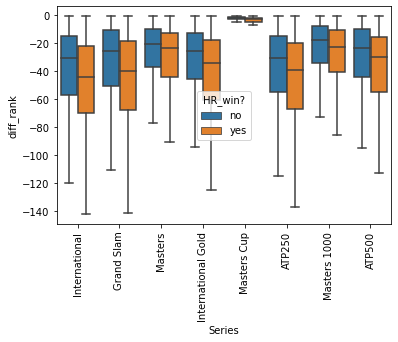

In [25]:
sns.boxplot(x="Series",y="diff_rank",data=tennis_data,hue="HR_win?",showfliers=False)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'International'),
  Text(1, 0, 'Grand Slam'),
  Text(2, 0, 'Masters'),
  Text(3, 0, 'International Gold'),
  Text(4, 0, 'Masters Cup'),
  Text(5, 0, 'ATP250'),
  Text(6, 0, 'Masters 1000'),
  Text(7, 0, 'ATP500')])

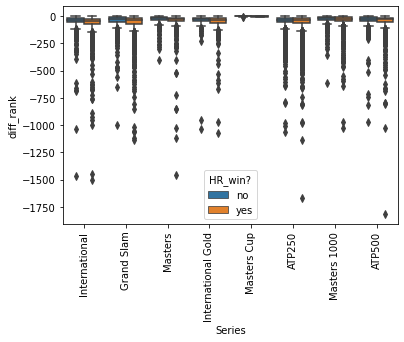

In [26]:
sns.boxplot(x="Series",y="diff_rank",data=tennis_data,hue="HR_win?",showfliers=True)
plt.xticks(rotation=90)

Looking at the boxplot above, it appears the range of differences in rank in which a lower-ranked player upsets a higher-ranked player is narrower in Grand Slam matches than in International matches. However, the interval is wider than in Masters tournaments, so in Masters matches it may make more sense to bet on the higher-ranked player most of the time. Past a certain threshold (the higher-ranked player is 200 spots higher in the ranking), we could default to the higher-ranked player winning, since the odds of a lower-ranked player pulling off an upset are significantly lower once the differences becomes large enough.

In [29]:
tennis_data.columns

Index(['Location', 'Date', 'Series', 'Court', 'Surface', 'HR_name', 'LR_name',
       'higher_ranked_rank', 'higher_ranked_prob',
       'higher_ranked_matches_per_day_rate', 'higher_ranked_win_pct',
       'higher_ranked_court_type_win_pct',
       'higher_ranked_surface_type_win_pct',
       'higher_ranked_series_type_win_pct', 'lower_ranked_rank',
       'lower_ranked_prob', 'lower_ranked_matches_per_day_rate',
       'lower_ranked_win_pct', 'lower_ranked_court_type_win_pct',
       'lower_ranked_surface_type_win_pct', 'lower_ranked_series_type_win_pct',
       'diff_rank', 'diff_prob', 'diff_matches_per_day_rate', 'diff_win_pct',
       'diff_court_type_win_pct', 'diff_surface_type_win_pct',
       'diff_series_type_win_pct', 'HR_win?'],
      dtype='object')

<AxesSubplot:xlabel='diff_matches_per_day_rate', ylabel='diff_prob'>

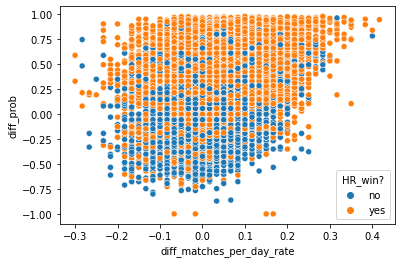

In [30]:
sns.scatterplot(data=tennis_data,x="diff_matches_per_day_rate",y="diff_prob",hue="HR_win?")

In [39]:
corr_table = tennis_data[["diff_prob","diff_matches_per_day_rate","diff_win_pct", "diff_rank"]].corr()
corr_table = corr_table.reset_index()
#https://stackoverflow.com/questions/28654047/pandas-convert-some-columns-into-rows
corr_table = corr_table.melt(id_vars=['index'],var_name="var2",value_name="corr")
corr_table = corr_table.rename({"index":"var1"},axis=1)
corr_table = corr_table[corr_table['corr']!=1]
corr_table = corr_table.drop_duplicates(subset=["corr"])
#https://stackoverflow.com/questions/30486263/sorting-by-absolute-value-without-changing-the-data
corr_table.sort_values(by="corr",key=abs,ascending=False).head()

,var1,var2,corr
2,diff_win_pct,diff_prob,0.513464
6,diff_win_pct,diff_matches_per_day_rate,0.494621
1,diff_matches_per_day_rate,diff_prob,0.302771
7,diff_rank,diff_matches_per_day_rate,-0.215299
11,diff_rank,diff_win_pct,-0.170749
